IN THIS NOTEBOOK I HAVE FITTED 80% OF THE DATA FOR TRAINING AND TESTED FOR THE REST RESULTING TO GET SUM OF SQUARED ERROR 6.5

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
dataframe = pd.read_csv('ex1data1.txt',header=None)

In [3]:
X = np.array(dataframe[0])
numberOfTrainingElements=round(len(X)*0.8)
numberOfTrainingElements

78

In [4]:
Y = np.array(dataframe[1])

In [5]:
x_Train = X[0:numberOfTrainingElements].reshape((-1,1))

In [6]:
y_Train = Y[0:numberOfTrainingElements]

In [7]:
x_Test,y_Test = X[numberOfTrainingElements:],Y[numberOfTrainingElements:]

In [8]:
LinReg = LinearRegression()

In [9]:
LinReg.fit(x_Train,y_Train)

LinearRegression()

In [10]:
y_pred = LinReg.predict(x_Test.reshape(-1, 1))

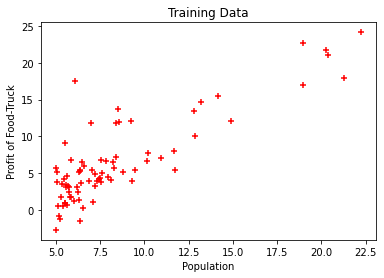

In [11]:
plt.scatter(x_Train,y_Train,color = 'red',marker = '+')
plt.xlabel("Population")
plt.ylabel("Profit of Food-Truck")
plt.title("Training Data")
plt.show()

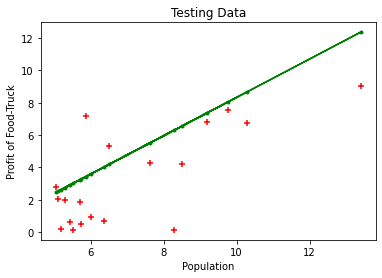

In [12]:
plt.scatter(x_Test,y_Test,color = 'red',marker = '+')
plt.plot(x_Test,y_pred,color = 'green',marker ='.')
plt.title("Testing Data")
plt.xlabel("Population")
plt.ylabel("Profit of Food-Truck")
plt.show()

In [13]:
print(f"Value of the slope(Theta1) is {LinReg.coef_}")

Value of the slope(Theta1) is [1.18513672]


In [14]:
print(f"Value of the y-intercept(Theta0) is {LinReg.intercept_}")

Value of the y-intercept(Theta0) is -3.5250734722745323


In [15]:
Theta = [LinReg.intercept_,LinReg.coef_]

In [16]:
Theta

[-3.5250734722745323, array([1.18513672])]

In [17]:
print('Mean Squared Error is:',mean_squared_error(y_Test,y_pred))

Mean Squared Error is: 6.504499741059672


In [18]:
def computeCost(X, y, Theta):
    m = y.size  # number of training examples
    
    
    J = 0
    
    
    h = np.dot(X, Theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, Theta) - y))

    return J

In [19]:
data = np.loadtxt(('ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  

In [20]:
X = np.stack([np.ones(m), X], axis=1)
computeCost(X,y,Theta)

4.524334213263661

In [21]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]  
    theta = theta.copy()
    
    J_history = []     
    for i in range(num_iters):
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [22]:
Theta,J = gradientDescent(X,y,Theta,alpha=0.01,num_iters=1500)

<ipython-input-21-b4201bb662bb>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)


In [23]:
Theta

array([array([-3.8712195]), array([1.19056619])], dtype=object)